## Q5

### reference: http://www.math.ntu.edu.tw/~hchen/teaching/StatInference/notes/lecture23.pdf

For any $y$ such that $f_{Y}(y)>0$, the conditional pdf of $X$ given that $Y=y$ is the function of
$x$ denoted by $f(x \mid y)$ and defined by

$f(y \mid x)=\frac{f(x, y)}{f_{X}(x)}$

$f(x \mid y)=\frac{f(x, y)}{f_{Y}(y)}$

$\forall \;x \geqslant 0 ,\;y \geqslant 0$

$
\begin{eqnarray} 
f_{X}(x)
&=& \int_{0}^{+\infty }f(x, y)dy \\
&=& \int_{0}^{+\infty }ce^{-(xy+x+y)}dy \\
&=& \int_{0}^{+\infty }c \cdot e^{-x} \cdot e^{-(x+1)y}dy \\
&=& c \cdot e^{-x} \cdot \frac{1}{-(1+x)} \cdot \underset{y\rightarrow +\infty }{lim} (e^{-(1+x)y}-1) \\
&=& \frac{c \cdot e^{-x}}{1+x}
\end{eqnarray} \\
$

$
\begin{eqnarray} 
\texttt{Similarly, marginal of Y:} \\
f_{Y}(y) = \frac{c \cdot e^{-y}}{1+y}
\end{eqnarray} \\
$

$f(y \mid x) =\frac{f(x, y)}{f_{X}(x)} = (1+x)e^{-y(1+x)} = Exp(y;\lambda = (1+x))\\$
$f(x \mid y) =\frac{f(x, y)}{f_{Y}(y)} = (1+y)e^{-x(1+y)} = Exp(x;\lambda = (1+y))$

$
\begin{eqnarray} 
\texttt{Conclusion, for given Y=y: } X \sim Exp(1+y) \\
\texttt{        for given X=x: } Y \sim Exp(1+x)
\end{eqnarray} \\
$

In [1]:
#Import libraries
from scipy.stats import expon
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Set the seed
np.random.seed(44)

In [3]:
# initial values
x = 1

In [4]:
# simulation parameters
N = 1000
burnin = 300

In [5]:
#Using a list store the x_i and y_i
X_Sample = []
Y_Sample = []

In [6]:
for i in range(N+burnin):
    #Sampling y for given x
    y = float(np.random.exponential(1+x, 1))
    x = float(np.random.exponential(1+y, 1))

    #Upgrading
    if i >= burnin:
        #Store the data
        X_Sample.append(x)
        Y_Sample.append(y)

Text(0, 0.5, 'y')

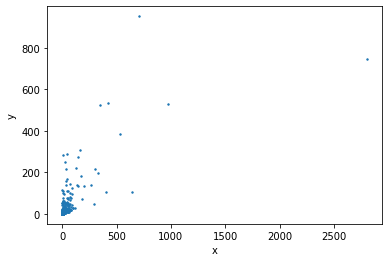

In [7]:
synth_plot = plt.scatter(X_Sample, Y_Sample,s=2)
plt.xlabel("x")
plt.ylabel("y")

pop_list = []
for i in range(0,len(X_Sample)):
    if X_Sample[i]>500 or Y_Sample[i]>500:
        pop_list.append(i)
    else:
        pass
X_Sample = [X_Sample[i] for i in range(len(X_Sample)) if i not in pop_list]
Y_Sample = [Y_Sample[i] for i in range(len(Y_Sample)) if i not in pop_list]
synth_plot = plt.scatter(X_Sample, Y_Sample,s=2)
plt.xlabel("x")
plt.ylabel("y")

pop_list = []
for i in range(0,len(X_Sample)):
    if X_Sample[i]>80 or Y_Sample[i]>80:
        pop_list.append(i)
    else:
        pass
X_Sample = [X_Sample[i] for i in range(len(X_Sample)) if i not in pop_list]
Y_Sample = [Y_Sample[i] for i in range(len(Y_Sample)) if i not in pop_list]
synth_plot = plt.scatter(X_Sample, Y_Sample,s=2)
plt.xlabel("x")
plt.ylabel("y")

pop_list = []
for i in range(0,len(X_Sample)):
    if X_Sample[i]>16 or Y_Sample[i]>16:
        pop_list.append(i)
    else:
        pass
X_Sample = [X_Sample[i] for i in range(len(X_Sample)) if i not in pop_list]
Y_Sample = [Y_Sample[i] for i in range(len(Y_Sample)) if i not in pop_list]
synth_plot = plt.scatter(X_Sample, Y_Sample,s=2)
plt.xlabel("x")
plt.ylabel("y")

pop_list = []
for i in range(0,len(X_Sample)):
    if X_Sample[i]>3.2 or Y_Sample[i]>3.2:
        pop_list.append(i)
    else:
        pass
X_Sample = [X_Sample[i] for i in range(len(X_Sample)) if i not in pop_list]
Y_Sample = [Y_Sample[i] for i in range(len(Y_Sample)) if i not in pop_list]
synth_plot = plt.scatter(X_Sample, Y_Sample,s=2)
plt.xlabel("x")
plt.ylabel("y")

sum = 0
for i in range(N):
    x = X_Sample[i]
    y = Y_Sample[i]
    k = x+y+x*y
    try:
        s = 1/(math.exp(k))
    except OverflowError:
        s = 0
    sum = sum + s
print(sum/1000)

In [8]:
def Gibbs_Sampling(N, burnin, initial_value,seed=None):
    if seed!=None:
        np.random.seed(seed)

    X_Sample = []
    Y_Sample = []
    x = initial_value
    for i in range(N+burnin):
        #Sampling y for given x
        y = float(np.random.exponential(1+x, 1))
        x = float(np.random.exponential(1+y, 1))

        #Upgrading
        if i >= burnin:
            #Store the data
            X_Sample.append(x)
            Y_Sample.append(y)
    sum = 0
    for i in range(N):
        x = X_Sample[i]
        y = Y_Sample[i]
        k = x+y+x*y
        try:
            s = 1/(math.exp(k))
        except OverflowError:
            s = 0
        sum = sum + s
    return sum/N

Average is:  0.06960987528553901


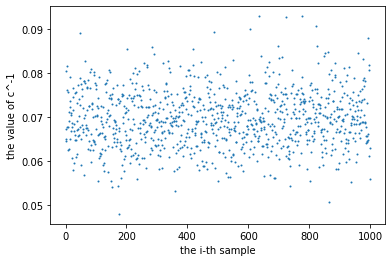

In [10]:
C = []
N = 1000
burnin = 100
initial_value = 10
for i in range(N):
    C.append(Gibbs_Sampling(N, burnin, initial_value))
synth_plot = plt.scatter([i for i in range(N)], C, s=1)
plt.xlabel("the i-th sample")
plt.ylabel("the value of c^-1")
print("Average is: ",np.mean(C))